Learnt from :
1. [elitedatascience-seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial)
2. [Data visualization with Seaborn](https://www.oreilly.com/learning/data-visualization-with-seaborn)
3. [Python Seaborn Tutorial For Beginners](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)
4. [Better Plotting In Python With Seaborn](https://robinsones.github.io/Better-Plotting-in-Python-with-Seaborn/)

In [1]:
# Pandas for managing datasets
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns

We can set the seaborn style as the default matplotlib style by calling `sns.set()` : after doing this, even simple matplotlib
plots will look much better. If not used the default matplotlib style will be used in the plots.

In [10]:
sns.set()

In [6]:
# Loading dataset
df = pd.read_csv('Pokemon.csv', encoding = "ISO-8859-1", index_col = 0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


While working with the above datset got this error : __UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 7: invalid start byte__ . To fix this , referred this [post in stackoverflow](https://stackoverflow.com/a/18172249). 

>`read_csv` takes an encoding option to deal with files in different formats. I mostly use `read_csv('file', encoding = "ISO-8859-1")`, or alternatively `encoding = utf8` for reading, and generally `utf-8` for `to_csv`. You can also use the alias `latin1` instead of `ISO-8859-1`.

## Plotting a scatterplot

Use the `lmplot()` function.

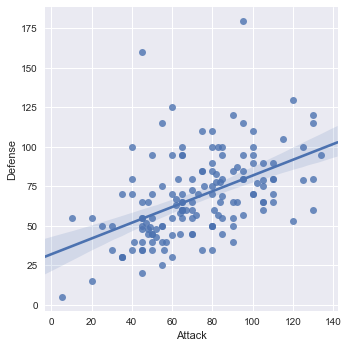

In [11]:
sns.lmplot(x = 'Attack', y = 'Defense', data = df);

By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the `lmplot()`:

- First, we'll set `fit_reg=False` to remove the regression line, since we only want a scatter plot.
- Then, we'll set` hue='Stage'` to color our points by the Pokémon's evolution stage. 

This __hue__ argument is very useful because it allows you to express a third dimension of information using color.

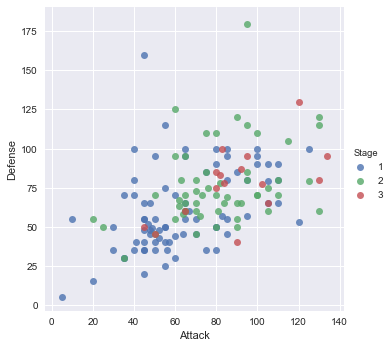

In [13]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage');   # Color by evolution stage

Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you _most_ of the way there, but you'll sometimes need to bring in Matplotlib.

## To set axes limits
1. First, invoke your Seaborn plotting function as normal.
2. Then, invoke Matplotlib's customization functions. In this case, we'll use its `plt.ylim()` and `plt.xlim()` functions.

Eg : 

```
# Customizing with MatplotlibPython
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)
```

For more information on Matplotlib's customization functions, check out its [documentation](https://matplotlib.org/users/pyplot_tutorial.html).

### The role of Pandas.
Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted (that's where Pandas comes up).

## Boxplot

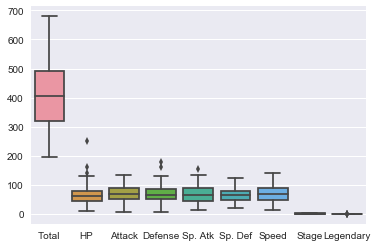

In [16]:
sns.boxplot(data = df);

some columns we'd probably like to remove:

- We can remove the Total since we have individual stats.
- We can remove the Stage and Legendary columns because they aren't combat stats

Let's create a new DataFrame called `stats_df` that only keeps the stats columns:

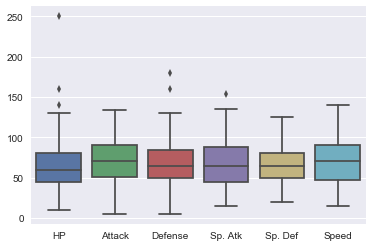

In [18]:
# Dropping columns
stats_df = df.drop(['Total','Stage','Legendary'], axis = 1)

# New boxplot made using stats_df
sns.boxplot(data = stats_df);

## Seaborn Themes
Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called 'darkgrid'.

We can change the theme using `sns.set_style()`. It takes one of five arguments: `white`, `dark`, `whitegrid`, `darkgrid`, and `ticks`.These are the five options for the background of your plot; the default one is darkgrid. 

Next, we'll change the theme to 'whitegrid' while making a violin plot.

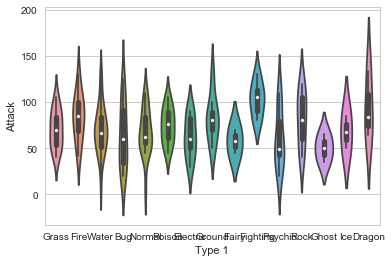

In [20]:
# set theme
sns.set_style('whitegrid')

# Violin plot
sns.violinplot(x = 'Type 1', y = 'Attack', data = df);

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

Now, Pokémon fans might find something quite jarring about that plot: The colors are nonsensical. Why is the Grass type colored pink or the Water type colored orange? We must fix this!

## Color palettes.

Seaborn allows us to set custom color palettes. We can simply create an ordered __Python list__ of color hex values.

Using [wikipedia web colors](https://en.wikipedia.org/wiki/Web_colors) to help us create a new color palette:

In [21]:
pokemon_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

 Now we can simply use the `palette=` argument to recolor our chart.

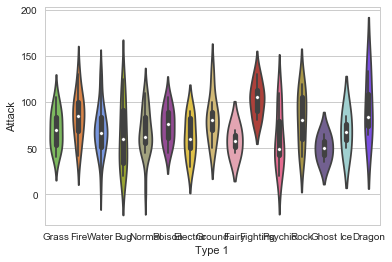

In [23]:
# Violin plot with Pokemon color palette
sns.violinplot(x = 'Type 1', y = 'Attack', data = df,
              palette = pokemon_type_colors); # Set color palette

## Adjusting height and width of figure obtained using seaborn

to scale the figure use : `plt.figure(figsize=(width, height))`

You can also set figure size by passing dictionary to __rc__ parameter with key `figure.figsize` in seaborn `set` method:

```
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
```
Also [Refer](https://stackoverflow.com/a/47955814).

## To save the figure use :


`plt.figsize("Output_file_name.png", dpi = 400)`

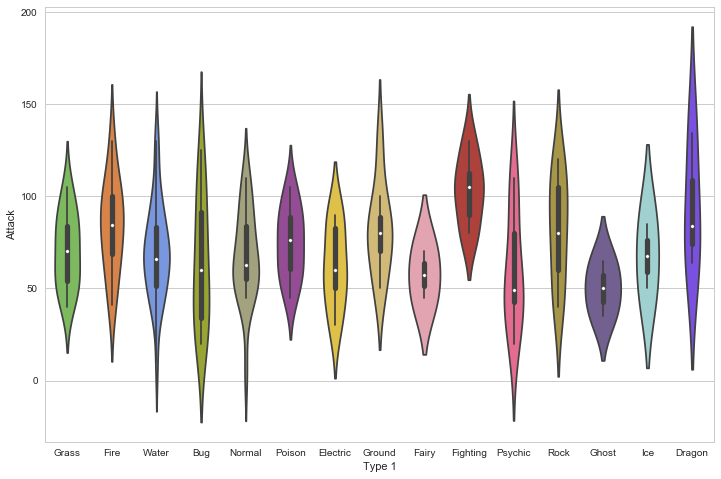

In [35]:
plt.figure(figsize=(12, 8))
sns.violinplot(x = 'Type 1', y = 'Attack', data = df, palette = pokemon_type_colors);
plt.savefig("Palette_tutorial.png", dpi=400)

In [36]:

new_colors = ['#228B22',  # Grass
                    '#FF8C00',  # Fire
                    '#00FFFF',  # Water
                    '#DAA520',  # Bug
                    '#FAEBD7',  # Normal
                    '#8B0000',  # Poison
                    '#FFFF00',  # Electric
                    '#8B4513',  # Ground
                    '#FFE4E1',  # Fairy
                    '#2F4F4F',  # Fighting
                    '#FF00FF',  # Psychic
                    '#B22222',  # Rock
                    '#808080',  # Ghost
                    '#B0E0E6',  # Ice
                    '#FFA500',  # Dragon
                   ]

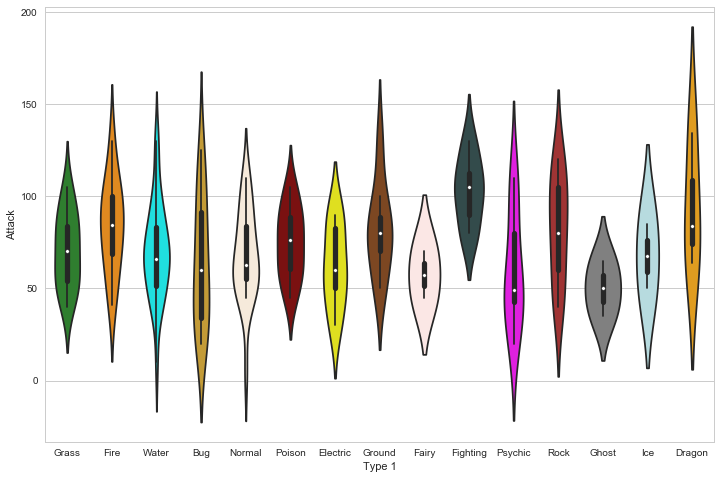

In [37]:
plt.figure(figsize=(12, 8))
sns.violinplot(x = 'Type 1', y = 'Attack', data = df, palette = new_colors);
plt.savefig("Palette_mine.png", dpi=400)